__Chapter 2 - Training simple machine learning algorithms for classification__

1. [](#)


Key topics:
* Build a perceptron from scratch

In [1]:
import os
import sys
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

modulePath = os.path.abspath(os.path.join('../../Visualization'))
if modulePath not in sys.path:
    sys.path.append(modulePath)
import snsStyle
import viz
sns.set(rc = snsStyle.rcGrey)

# Settings
import warnings; warnings.simplefilter('ignore')
np.set_printoptions(threshold = np.inf, suppress = True)
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:78% !important; }</style>"))

from sklearn.datasets import load_iris

## Artificial neuron

### Intuition: perceptron

#### Decision function 

A basic perceptron is a binary classifier that uses the decision function...

$\phi(z) =
\left\{
    \begin{array}{ll}
        1  & \mbox{if } z >= \theta \\
        -1  & \mbox{otherwise}
    \end{array}
\right.$

...to designate an observation $x^i$ as belonging to the positive class '1' or the negative class '-1'. The input $z$ is the dot product of a weight vector  $\mathbf{w}$ and an input vector $\mathbf{x}$. Each value in vector $\mathbf{x}$ represents a specific feature value of the observation $x^i$ and vector $\mathbf{w}$ represents the weights associated with each feature.The equation for $z$ is...

$$
z = w_1x_1 + ... + w_nx_n = \mathbf{w}^T\mathbf{x}
$$

...where $n$ is the number of features/weights associated with $x^i$. If the value of $z$ for a particular observation $x^i$ is greater than or equal to a pre-defined theshold $\theta$, class '1' is predicted, otherwise class '-1' is predicted.

A small adjustment to the variabls considered simplifies our notation. If we move subtract the threshold $\theta$ to move it to the left side side of the decision function...

$\phi(z) =
\left\{
    \begin{array}{ll}
        1  & \mbox{if } z >= 0 \\
        -1  & \mbox{otherwise}
    \end{array}
\right.$

...and add weight sub-zero $w_0 = -\theta$ and $x_0 = 1$ to our dot product function $z$...


$$
z = w_0x_0 + w_1x_1 + ... + w_nx_n = \mathbf{w}^T\mathbf{x}
$$

...we can now use 0 as our threshold in the decision function. Our negative threshold, $w_0 = -\theta$, is referred to as the bias unit.

In machine learning parlance, this decision function is a step function that will 'squish' our input $x$ such that the output why is either 1 or -1. To associated this with neurons, and 1 or -1 indicates whether a neuron 'fires' or not based on its input.

#### Learning rule

The perceptron 'learns' by updating its weights after each epoch, or iteration. The learning rule updates each weight $w_j$ by...

$$
w_j := w_j + \Delta w_j
$$

...where $\Delta w_j$ is determined by...

$$
\Delta w_j = \eta(y^i - \hat{y}^i)x_j^i
$$

In this equation, 
- $w_j$ is the initial weight for the $j$th of $n$ features
- $\eta$ is the learning rate (typically a value between 0.0 and 1.0)
- $y^i$ is the true class label for observation $x^i$
- $\hat{y}^i$ is the class label estimated by the decision function $\phi(z)$
- $x_j^i$ is the value of the $j$th feature for the $i$th observation and acts as a multipicative factor

If $\phi(z)$ returns the correct class label, the weight remains unchanged because $\Delta w_j$ evaluates to zero. If the true class is positive, but the prediction is negative, the weight is pushed in the direction of the positive class by making $x_j^i \times w_j$ more positive by...

$$
\Delta w_j = \eta(1 - (-1))x_j^i = \eta(2)x_j^i
$$

...and if the true class is negative, but the prediction is positive, the weight is pushed in the direction of the positive class by making $x_j^i \times w_j$ more negative by...

$$
\Delta w_j = \eta(-1 - 1)x_j^i = \eta(-2)x_j^i
$$

The weight update is proportional to the value of $x_j^i$

One important thing to note is that the perceptron converges only when the two classes are linearly separable. Either a maximum number of epochs or a tolerable number of misclassifcations are required to prevent the perceptron from running indefinitely.

## Code

__Code: object-oriented perceptron API__

In [2]:
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier written from scratch.
    
    Parameters:
    eta: learning rate
    n_iter: number of passes through the training data
    random_state: seed for random weight initialization
    
    Attributes:
    w_: weights after fitting
    errors_: number of misclassifications in each epoch (iter)
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Parameters:
        X: m x n matrix containing training data. Includes m samples and n features
        y: Vector of target values. Contain m values.
        
        Returns:
        self
         """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0
                             ,scale = 0.01
                             ,size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors_ = 0
            for xi, target in zip (X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calc net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

__Code explained__

```python
def net_input()
```
Returns the dot product of a sample $x^i$ from the training data $\mathbf{X}$ and a weight vector containing weights $w_1$ ... $w_n$. The weight $w_0$ is added on to the dot product.

```python
def predict()
```

Returns the predicted classes label. 1 if net_input() returns a number >= 0, else returns -1. Used within the fit method but can also be used to predict new, unseen data.

```python
def fit()
```

Determines our model by finding the ideal weights. Takes in an *m* row by *n* column matrix $\mathbf{X}$ and an *m* by 1 value vector $\mathbf{y}$, which includes the actual class labels. Initial weights are set to random numbers drawn from a normal distribution with a standard deviation of 0.01. The number of values in the weight vector is equal the number of columns in $\mathbf{X}$ plus 1 (for the bias unit).

The fit method runs for a specified number of iterations. Within each iteration, each sample in the training data $\mathbf{X}$, along with its corresponding label in vector $\mathbf{y}$ is evaluated. The weights are adjusted after each training sample is evaluated.

The errors are also collected after each epoch so that we can observe how the model performs during training.

__Code - execute__

In [2]:
# Import iris dataset

iris = load_iris()
df = pd.DataFrame(np.c_[iris['data'], iris['target']]
                  ,columns = iris['feature_names'] + ['target'])

# Trim iris data set down to two classes and two features

df = df.iloc[0:100, [0, 2, 4]]
df['target'] = np.where(df['target'] == 0.0, -1, 1)
df[:5]


,sepal length (cm),petal length (cm),target
0,5.1,1.4,-1
1,4.9,1.4,-1
2,4.7,1.3,-1
3,4.6,1.5,-1
4,5.0,1.4,-1


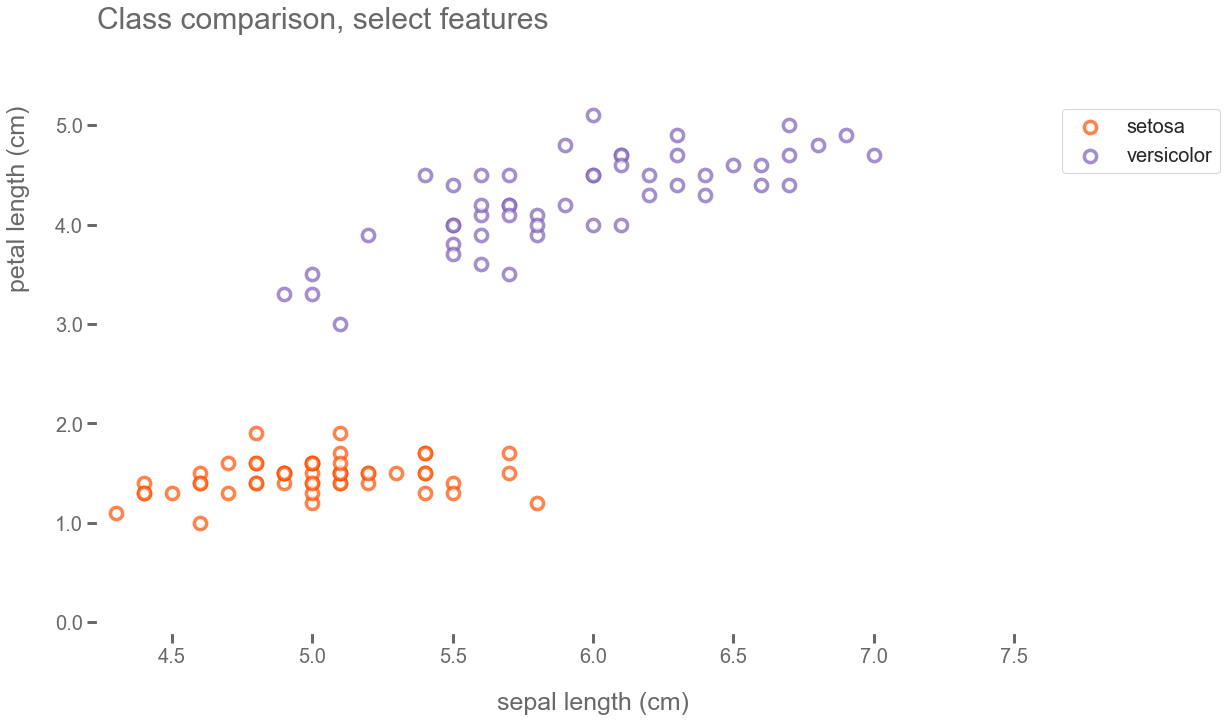

In [3]:
importlib.reload(snsStyle)
importlib.reload(viz)        
ax = viz.viz2dScatterHue(df = df
               ,x = 'sepal length (cm)'
               ,y = 'petal length (cm)'
               ,targetCol = 'target'
               ,targetLabels = iris['target_names'][:2]
               ,title = 'Class comparison, select features'
               ,chartSize = 15
               ,yShift = 0.75
               )

In [ ]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(x = range(1, len(ppn.errors_) + 1)
        ,y = ppn.errors_
        ,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_dfecision_regions(X, y, classifier, resolution = 0.02):
    
    # marker generator and colormap
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ('red','blue','lightgreen','gray','cyan')
    
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution)
                          ,np.arange(x1_min, x1_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1
                ,xx2
                ,Z
                ,alpha = 0.3
                ,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0]
                   ,y = X[y == cl, 1]
                   ,alpha = 0.8
                   ,c = colors[idx]
                   ,marker = markers[idx]
                   ,label = class,edgecolor = 'black')
    